# Exemplo Mnist Convnet utilizando Keras

O dataset Mnist é constituído por imagens dos 10 dígitos, escritos à mão. Cada imagem tem uma dimensão de 28x28 píxeis e os dígitos encontram-se a branco e o fundo a preto.

Treino: 60000 imagens
Test: 10000 imagens

## Bibliotecas

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

## Preparação do dataset

In [ ]:
num_classes = 10 # número de classes, uma para cada dígito
input_shape = (28, 28, 1) # dimensões do input

# carregar os dados
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


# Normalização dos dados

# converter o valor de cada píxel de [0, 255] para [0, 1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# garantir que as imagens têm as dimensões corretas
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# converter dados de vectors para matrizes
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Visualização de dados de treino

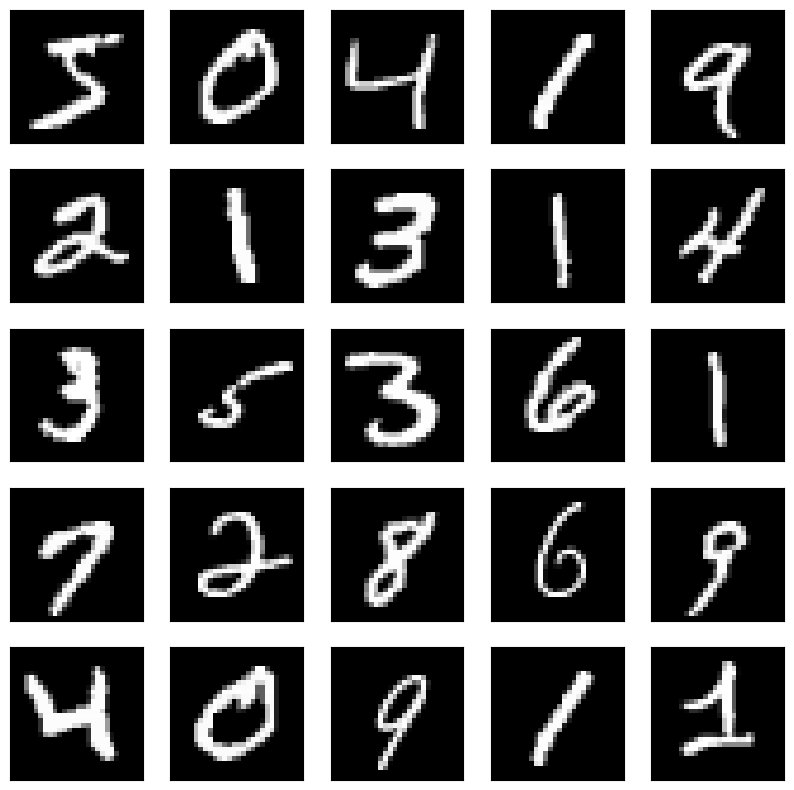

In [ ]:
plt.figure(figsize=(10,10))

for i in range(25):

    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], "gray")

plt.show()

## Construir modelo

In [ ]:
# simples convnet
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

## Treinar o modelo

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer = "adam", metrics=["accuracy"]) # compilar o modelo

model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.1) # treino do modelo

Epoch 1/15
422/422 [==============================] - 21s 12ms/step - loss: 0.3751 - accuracy: 0.8863 - val_loss: 0.0850 - val_accuracy: 0.9762
Epoch 2/15
422/422 [==============================] - 3s 7ms/step - loss: 0.1150 - accuracy: 0.9651 - val_loss: 0.0610 - val_accuracy: 0.9830
Epoch 3/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0868 - accuracy: 0.9732 - val_loss: 0.0488 - val_accuracy: 0.9867
Epoch 4/15
422/422 [==============================] - 5s 11ms/step - loss: 0.0736 - accuracy: 0.9772 - val_loss: 0.0425 - val_accuracy: 0.9883
Epoch 5/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0635 - accuracy: 0.9809 - val_loss: 0.0415 - val_accuracy: 0.9880
Epoch 6/15
422/422 [==============================] - 3s 8ms/step - loss: 0.0568 - accuracy: 0.9823 - val_loss: 0.0386 - val_accuracy: 0.9893
Epoch 7/15
422/422 [==============================] - 2s 6ms/step - loss: 0.0522 - accuracy: 0.9833 - val_loss: 0.0357 - val_accuracy: 0.9913
Ep

# Avaliar modelo

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0) # avaliar o modelo com dados de teste
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.026039568707346916
Test accuracy: 0.9911999702453613


# Previsões

In [ ]:
predictions = model.predict(x_test) # inferir

313/313 [==============================] - 1s 2ms/step


In [ ]:
# previsão do primeiro elemento de teste

print("Previsão: " + str(np.argmax(predictions[0])) + "\n")
print("Real: " + str(y_test[0])) # label

Previsão: 7

Real: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
# gráficos

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, "gray")

  predicted_label = np.argmax(predictions_array)

def plot_value_array(i, predictions_array, true_label):

  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

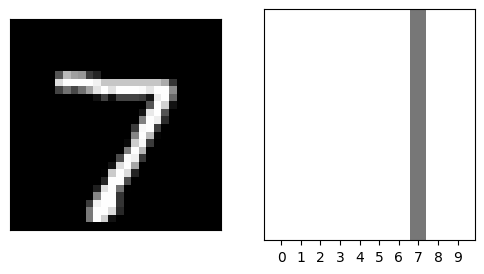

In [ ]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i],  y_test)
plt.show()